In [21]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

delays = {}

exec(open('utils.py').read())
print('Loaded')

MAX_YEAR = CURRENT_YEAR + 100 # CURRENT_YEAR defined in utils.py
years = list(range(CURRENT_YEAR, MAX_YEAR))

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 8         | -0.05303  | 0.5802    | 4.787     | 6.441     |
| 12        | -0.05094  | 0.506     | 7.383     | 8.034     |
| 15        | -0.05001  | 0.1986    | 4.249     | 6.515     |
| 25        | -0.05     | 0.04947   | 2.313     | 7.262     |
| 44        | -0.05     | 0.01      | 10.0      | 7.181     |
| 45        | -0.05     | 0.01      | 6.777     | 5.413     |
| 48        | -0.04995  | 0.01      | 3.376     | 4.311     |
| 62        | -0.04397  | 0.01      | 3.113     | 2.676     |
| 64        | -0.03179  | 0.01      | 2.665     | 1.516     |
| 67        | -0.01989  | 0.01      | 2.209     | 1.94      |
| 71        | -0.01587  | 0.01      | 1.908     | 1.723     |
Curve params found
{'push': 0.01, 'shift': 1.908466606166272, 'slope': 1.7232862560012998}
-
## Chance of nonscaling delay ##


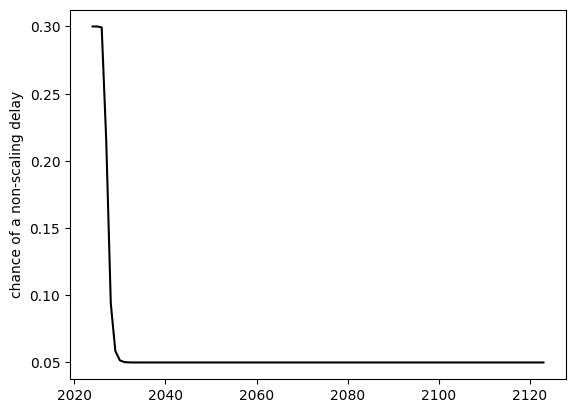

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - cha

In [22]:
nonscaling_points = [(2024, 0.3),
                     (2027, 0.2),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 32        | -0.04418  | 1.046     | 6.563     | 0.7955    |
| 42        | -0.03382  | 0.7116    | 7.371     | 1.116     |
Curve params found
{'push': 0.7116204312747159,
 'shift': 7.371213734004578,
 'slope': 1.1163582559407284}
-
## Chance of nonscaling delay ##


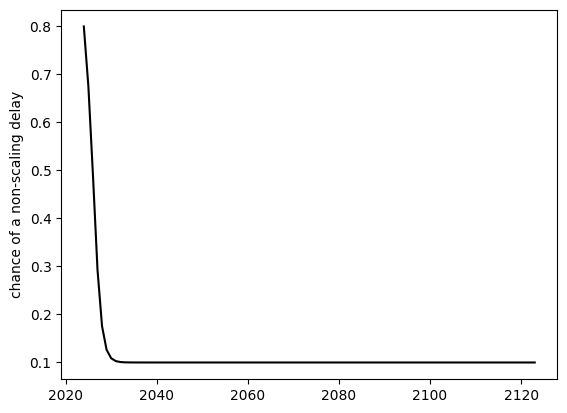

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 49%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2034

In [23]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.8),
                     (2026, 0.5),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2585   | 5.81      | 5.549     | 6.185     |
| 4         | -0.1983   | 2.111     | 9.922     | 8.394     |
| 6         | -0.1155   | 0.9706    | 5.798     | 0.1714    |
| 48        | -0.08883  | 1.27      | 6.06      | 0.4511    |
| 50        | -0.06355  | 0.904     | 5.809     | 0.5868    |
| 52        | -0.02623  | 0.4071    | 5.454     | 0.596     |
| 53        | -0.0104   | 0.2364    | 5.702     | 0.8456    |
Curve params found
{'push': 0.2363550513917969,
 'shift': 5.702479710220067,
 'slope': 0.8456044216484676}
-
## Chance of nonscaling delay ##


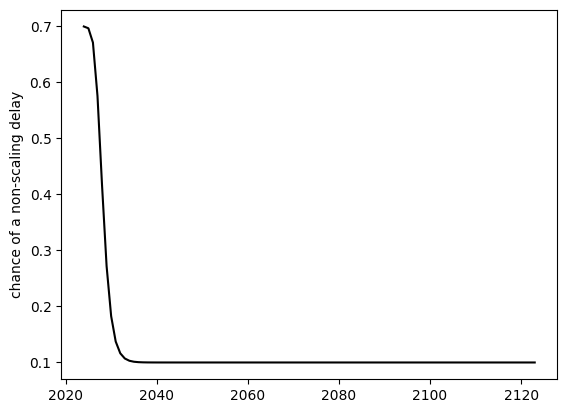

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 67%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 58%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 42%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2034

In [24]:
nonscaling_points = [(2024, 0.7),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.09461  | 3.728     | 2.515     | 6.244     |
| 3         | -0.08554  | 3.275     | 5.352     | 1.691     |
| 8         | -0.06469  | 1.145     | 4.229     | 1.409     |
| 24        | -0.05595  | 0.5891    | 2.997     | 8.31      |
| 28        | -0.0515   | 0.1248    | 0.5929    | 5.703     |
| 41        | -0.05     | 0.01      | 2.852     | 6.323     |
| 43        | -0.05     | 0.01      | 6.686     | 4.376     |
| 45        | -0.05     | 0.01      | 10.0      | 2.855     |
| 71        | -0.0492   | 0.01      | 3.033     | 1.677     |
Curve params found
{'push': 0.01, 'shift': 3.033126951557285, 'slope': 1.6774512219347755}
-
## Chance of nonscaling delay ##


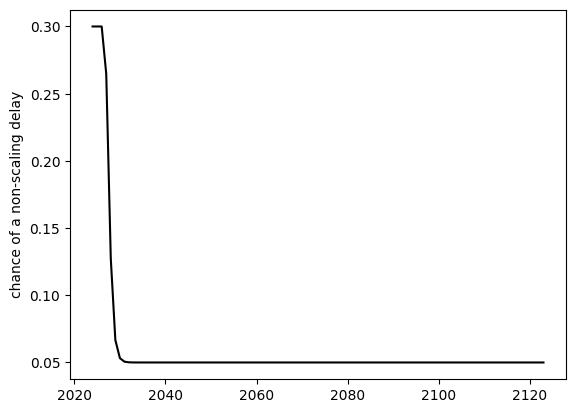

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - ch

In [25]:
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(1, 5)],
                                                                        [0.15, sq.lognorm(1, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

In [ ]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.4),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 6         | -0.05402  | 0.7168    | 8.104     | 4.216     |
| 7         | -0.04144  | 2.261     | 9.848     | 0.2606    |


##  Real world feedback delay

In [ ]:
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Take off speeds

In [ ]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [ ]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

In [ ]:
print('File last ran: {}'.format(dt.now()))